Using matplotlib backend: Qt5Agg


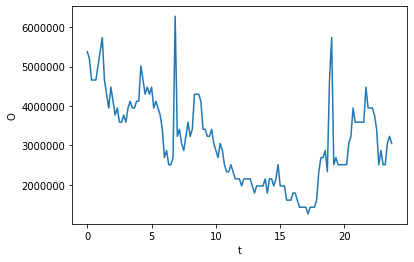

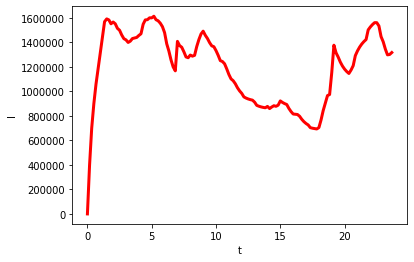

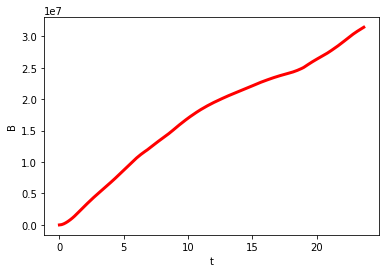

0.0 0.0
0.16667 397403.1750947656
0.33333 699450.9056108226
0.5 899369.9536385061
0.66667 1058234.513198639
0.83333 1184586.1973016488
1.0 1311781.4256889857
1.1667 1439686.1737076514
1.3333 1568194.2667773843
1.5 1590853.449656336
1.6667 1582744.9993328615
1.8333 1550966.8850340783
2.0 1565405.5074976303
2.1667 1550764.6495552626
2.3333 1513791.0509103527
2.5 1498239.5956198948
2.6667 1459785.5951230223
2.8333 1429743.993949445
3.0 1419660.109220309
3.1667 1398809.9874829059
3.3333 1409300.423874681
3.5 1430617.4008999355
3.6667 1435412.995560095
3.8333 1439661.8882000167
4.0 1456034.787078969
4.1667 1469471.1598722378
4.3333 1547061.6774621964
4.5 1582490.3506699214
4.6667 1584487.209762186
4.8333 1599853.941801876
5.0 1599237.2380901023
5.1667 1612533.335639866
5.3333 1584422.594636994
5.5 1575164.929008485
5.6667 1555742.36326715
5.8333 1527510.9910473228
6.0 1478986.2502967566
6.1667 1387756.1592378346
6.3333 1329102.1264587864
6.5 1256378.8192145757
6.6667 1199063.3871964691
6.83

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
get_ipython().magic(u'matplotlib')
from IPython import get_ipython
%matplotlib inline
#get_ipython().run_line_magic('matplotlib', 'qt')



b1 = np.genfromtxt("C:/Users/user/Desktop/s.txt")

def func(rpoint,tpoint,j):
    
    l = 0.5
    s = 1.0
    a = 0.9
    r = 0.01
    o = b1[:,1]

    I = rpoint[0]
    B = rpoint[1]
    
    #print(x,y,z)
    
    fk = l*s*o[j] - l*I - a*I + r*B
    fb = 1.48*(a*I - r*B)

    f = np.array([fk,fb])

    return f

# initial values
i = 0.0
b = 0.0

tpoint = b1 [:,0]

xpoint = []
ypoint = []

r = np.array([i,b])

h = float(23.667/len(tpoint))

i = 0
for t in tpoint:

    
    xpoint.append(r[0])
    ypoint.append(r[1])
    
    k1 = h*func(r,t,i)
    k2 = h*func(r+0.5*k1,t+0.5*h,i)
    k3 = h*func(r+0.5*k2,t+0.5*h,i)
    k4 = h*func(r+k3,t+h,i)
    
    r += (k1+2*k2+2*k3+k4)/6.0
    i = i+1

plt.plot(b1[:,0],b1[:,1])
plt.xlabel('t')
plt.ylabel('O')
plt.figure()
    
plt.plot(tpoint,xpoint,linewidth=3,color = 'r')
plt.xlabel('t')
plt.ylabel('I')
plt.figure()


plt.plot(tpoint,ypoint,linewidth=3,color = 'r')
plt.xlabel('t')
plt.ylabel('B')
#plt.figure()

plt.show()
for i in range(len(tpoint)):
    print(tpoint[i],xpoint[i])

In [10]:
from scipy.integrate import quad
from scipy.integrate import simps

#print(xpoint)
xpoint = np.array(xpoint)

tpoint = np.array(tpoint)
x1 = simps(xpoint,tpoint)
print(x1)

x2=simps(b1[:,1],tpoint)
print(x2)

28328534.108289964
73788633.6857787


In [11]:
z=x2/x1
print(z)

2.604745921681329
